In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('Admission_Predict_Ver1.1.csv')
df.shape

(500, 9)

In [3]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
X = df.iloc[:,1:8]
y = df.iloc[:,8:]

In [7]:
X.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0


In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size = 0.2)

In [9]:
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### ANN Model Building

In [11]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [12]:
model = Sequential()

model.add(Dense(7,activation ='relu',input_dim=7))
model.add(Dense(7,activation ='relu'))
model.add(Dense(1,activation ='linear'))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 7)                 56        
                                                                 
 dense_1 (Dense)             (None, 7)                 56        
                                                                 
 dense_2 (Dense)             (None, 1)                 8         
                                                                 
Total params: 120
Trainable params: 120
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(loss="mean_squared_error",optimizer = "Adam")

In [15]:
history=model.fit(X_train_scaled,y_train,epochs=500,validation_split = 0.2, verbose=1)

Epoch 1/500
10/10 [==============================] - 2s 35ms/step - loss: 1.4414 - accuracy: 0.0000e+00 - val_loss: 1.2571 - val_accuracy: 0.0000e+00
Epoch 2/500
10/10 [==============================] - 0s 8ms/step - loss: 1.1290 - accuracy: 0.0000e+00 - val_loss: 0.9872 - val_accuracy: 0.0000e+00
Epoch 3/500
10/10 [==============================] - 0s 6ms/step - loss: 0.9087 - accuracy: 0.0000e+00 - val_loss: 0.8043 - val_accuracy: 0.0000e+00
Epoch 4/500
10/10 [==============================] - 0s 7ms/step - loss: 0.7527 - accuracy: 0.0000e+00 - val_loss: 0.6674 - val_accuracy: 0.0000e+00
Epoch 5/500
10/10 [==============================] - 0s 7ms/step - loss: 0.6262 - accuracy: 0.0000e+00 - val_loss: 0.5577 - val_accuracy: 0.0000e+00
Epoch 6/500
10/10 [==============================] - 0s 6ms/step - loss: 0.5232 - accuracy: 0.0000e+00 - val_loss: 0.4620 - val_accuracy: 0.0000e+00
Epoch 7/500
10/10 [==============================] - 0s 18ms/step - loss: 0.4277 - accuracy: 0.0000e+00 -

In [16]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

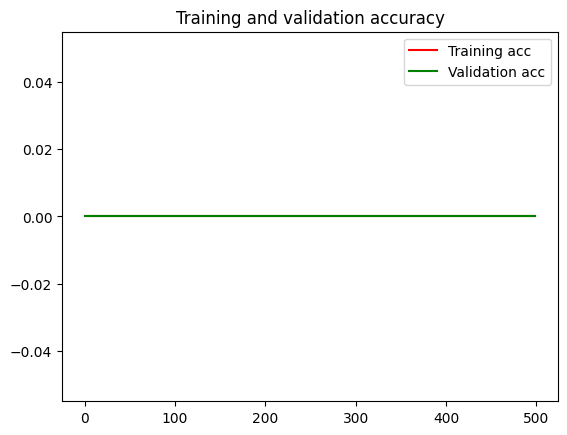

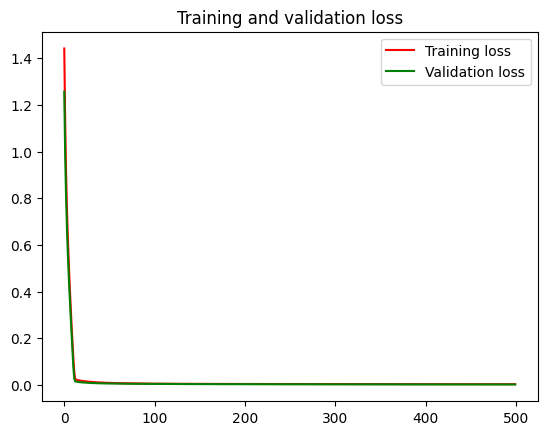

In [20]:
import matplotlib.pyplot as plt

# epochs = range(1, len(acc) + 1)

plt.plot(acc, color='r', label='Training acc')
plt.plot(val_acc, color='g', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(loss, color='r', label='Training loss')
plt.plot(val_loss, color='g', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [18]:
y_pred=model.predict(X_test_scaled)

4/4 [==============================] - 0s 8ms/step


In [22]:
from sklearn.metrics import r2_score
print("r2_score",r2_score(y_test,y_pred)

r2_score 0.8085682025478838


ValueError: continuous is not supported